In [5]:
import numpy as np
import pandas as pd

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
%matplotlib inline

In [14]:
df = pd.read_csv ('911.csv')

In [17]:
#print some data from starting of the file
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [18]:
#column info of the dataframe data in csv file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
lat          289240 non-null float64
lng          289240 non-null float64
desc         289240 non-null object
zip          253942 non-null float64
title        289240 non-null object
timeStamp    289240 non-null object
twp          289137 non-null object
addr         289240 non-null object
e            289240 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [20]:
#top 5 zipcode of 911 calls
df['zip'].value_counts().head(5)

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

In [21]:
#top 5 township
df['twp'].value_counts().head(5)

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: twp, dtype: int64

In [22]:
#find unique title count
df['title'].nunique()

131

In [24]:
#create a lambda function from title column to create a new column of reason of calls
x = df['title'].iloc[0]

In [25]:
x.split(":")[0]

'EMS'

In [30]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [31]:
#what is the mean reason for the 911 calls based on the new generated column
df['Reason'].value_counts().head()

EMS        144362
Traffic    101889
Fire        42989
Name: Reason, dtype: int64

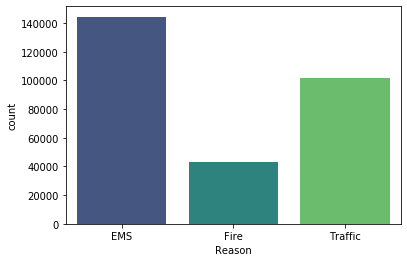

In [37]:
#use seaborn to create countplot for 911 reasons
sns.countplot(x='Reason', data=df, palette='viridis')

In [38]:
#data type of timeStamp column
type(df['timeStamp'].iloc[0])

str

In [39]:
#convert the timeStamp to Datetime object using pandas.to_datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'].iloc[0])

In [41]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [43]:
#get the hour from the timeStamp column
time = df['timeStamp'].iloc[0]
time.hour

17

In [49]:
#create 3 new columns Month, Hour, Day of Week based on the timeStamp column using lambda function
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [50]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,12,14,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,16,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,16,3


In [51]:
#map day of week into integer from 0 to 6 into actual day of the week
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [53]:
#change into column
df['Day of Week'] = df['Day of Week'].map(dmap)

In [54]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,12,14,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,16,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,16,Thu


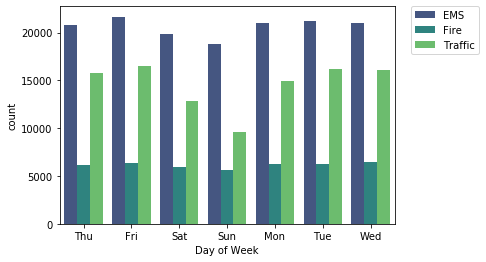

In [57]:
#seaborn countplot based on the day of the week calls based on the reason hue
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
#move the legend outside the graph boundary using the plt.legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

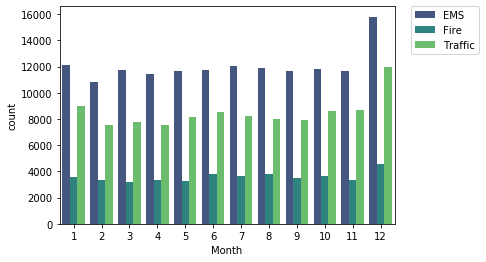

In [58]:
#perform the countplot for the month
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
#move the legend outside the graph boundary using the plt.legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

In [61]:
byMonth = df.groupby('Month').count()

In [62]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093


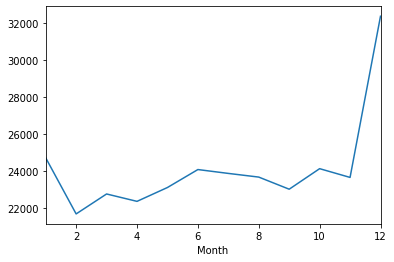

In [65]:
byMonth['lat'].plot()

In [68]:
#create new column called Date
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

In [67]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,12,14,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,16,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,16,Thu,2015-12-10


In [69]:
#group by Date column count() and countplot a graph for 911 calls
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


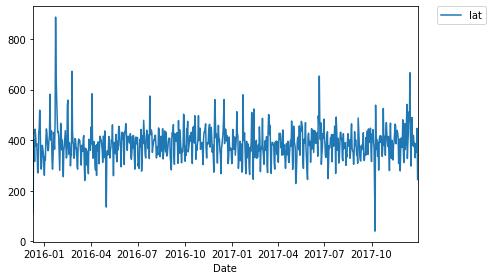

In [73]:
#plot now
df.groupby('Date').count()['lat'].plot()
#spread the graph layout
plt.tight_layout()
#move the legend outside the graph boundary using the plt.legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

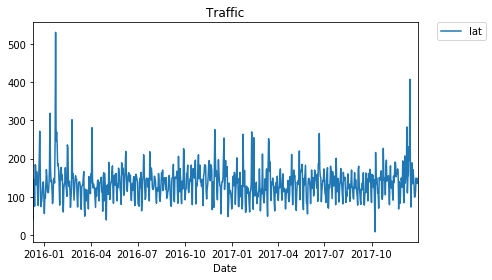

In [76]:
#plot now
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title("Traffic")
#spread the graph layout
plt.tight_layout()
#move the legend outside the graph boundary using the plt.legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

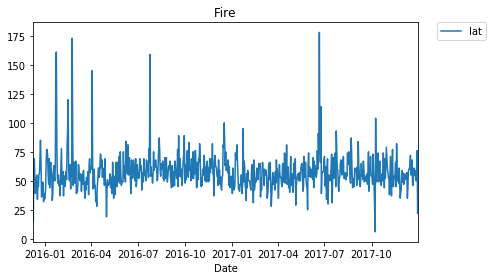

In [77]:
#plot now
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title("Fire")
#spread the graph layout
plt.tight_layout()
#move the legend outside the graph boundary using the plt.legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

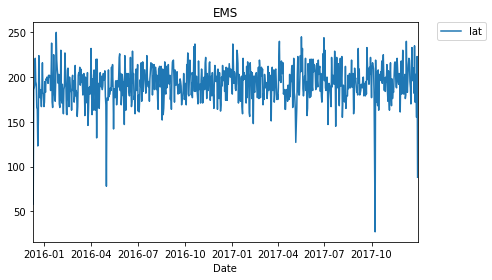

In [78]:
#plot now
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title("EMS")
#spread the graph layout
plt.tight_layout()
#move the legend outside the graph boundary using the plt.legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

In [80]:
#multi-column grouping
df.groupby(by=['Day of Week', 'Hour']).count()['Reason']

Day of Week  Hour
Fri          0        786
             1        688
             2        617
             3        576
             4        540
                     ... 
Wed          19      2038
             20      1834
             21      1522
             22      1261
             23       994
Name: Reason, Length: 168, dtype: int64

In [81]:
#print into multi-level matrix the grouping
df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,786,688,617,576,540,695,1136,1854,2169,2252,...,2729,2977,3114,3027,2405,2199,1890,1647,1559,1229
Mon,810,638,577,524,611,761,1155,1954,2425,2496,...,2468,2714,2796,2833,2437,1976,1714,1345,1165,895
Sat,992,867,808,699,644,686,842,1118,1450,1860,...,2342,2294,2268,2231,2185,2044,1771,1619,1429,1313
Sun,1031,922,868,716,629,658,801,1050,1324,1665,...,2033,1925,1970,1984,1947,1817,1569,1376,1064,979
Thu,771,616,659,526,516,722,1215,1984,2305,2405,...,2592,2752,2729,3018,2447,1998,1748,1554,1235,1015
Tue,774,635,570,537,557,771,1217,2007,2537,2481,...,2638,2846,3018,2970,2573,2044,1771,1516,1187,918
Wed,715,656,564,563,501,716,1256,2061,2357,2405,...,2631,2771,3025,3115,2490,2038,1834,1522,1261,994


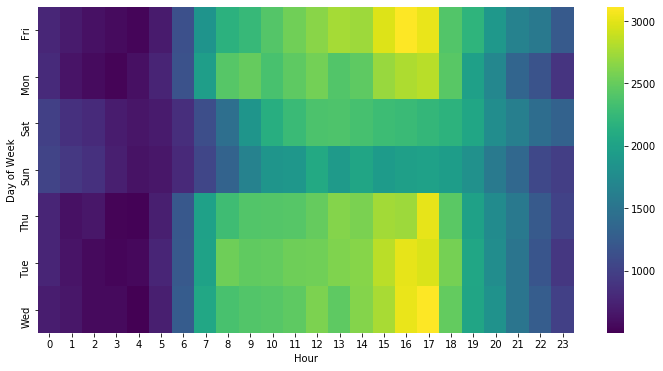

In [83]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

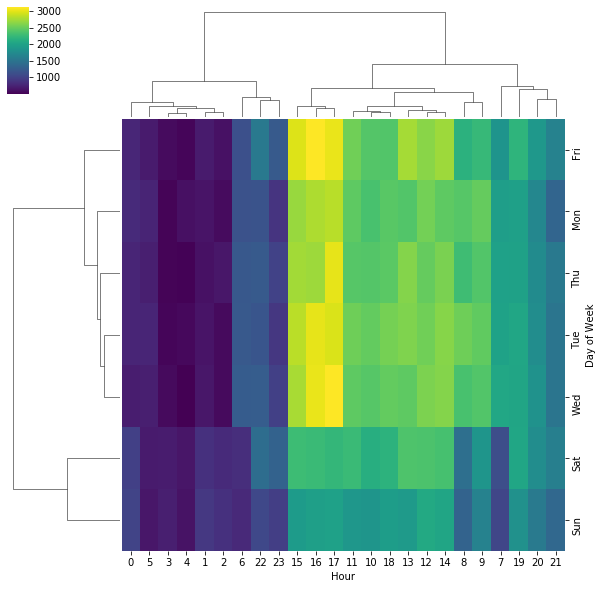

In [84]:
#clustermap
sns.clustermap(dayHour, cmap='viridis')

In [85]:
dayMonth=df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()

In [86]:
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,3527,3171,3532,3574,3278,3747,3736,3297,4226,3433,3377,5570
Mon,3706,3552,3103,3088,3538,3264,3687,3325,3031,4250,3262,4286
Sat,3527,2871,2539,3490,2764,3024,3515,2810,3144,3042,2972,4939
Sun,3470,2339,2229,3026,2580,2679,3259,2658,2565,3172,2592,3504
Thu,3182,3189,3909,3097,3289,4095,3248,3507,3702,3189,3478,4899


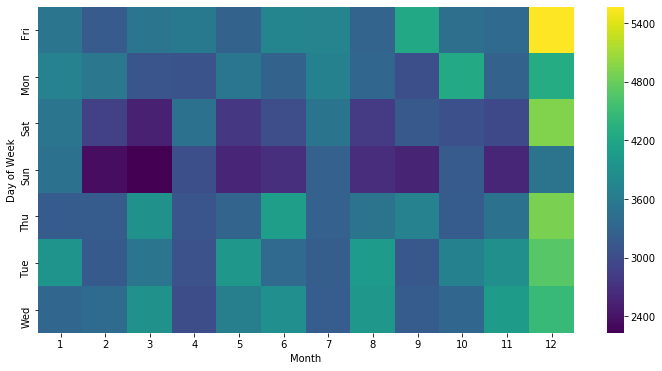

In [87]:
#create heatmap for day month
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='viridis')

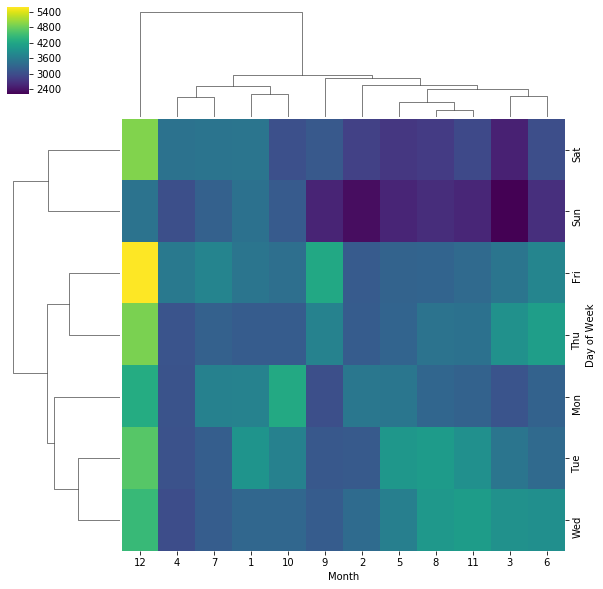

In [88]:
sns.clustermap(dayMonth, cmap='viridis')